In [1]:
import numpy as np #i just like to have this
import pandas as pd #dfs lul
import tiktoken # for counting tokens
import openai #for generating embeddings
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
sns.set_style("darkgrid")

In [2]:
#reference: https://github.com/openai/openai-cookbook/blob/297c53430cad2d05ba763ab9dca64309cb5091e9/examples/Embedding_Wikipedia_articles_for_search.ipynb
# gsm_train = pd.read_json(r"C:\Users\kaush\Desktop\fuck_you_chatPAL\pal\datasets\gsm_train.jsonl", lines=True)
gsm_test = pd.read_json(r"C:\Users\kaush\Desktop\fuck_you_chatPAL\pal\datasets\gsm_test.jsonl", lines=True)
df = gsm_test
questions = df["question"].values.tolist()
GPT_MODEL = "gpt-3.5-turbo" #for tokenizer selection

In [3]:
def num_tokens(text: str, model: str = GPT_MODEL) -> int:
    """Return the number of tokens in a string."""
    encoding = tiktoken.encoding_for_model(model)
    return len(encoding.encode(text))

In [4]:
token_counts = [num_tokens(question) for question in questions]

Mininum tokens to encode: 22
Maximum tokens to encode: 185


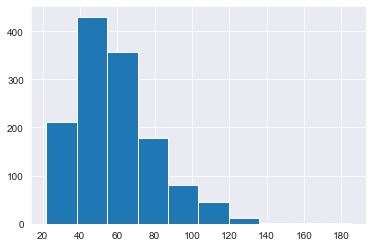

In [5]:
plt.hist(token_counts)
print(f"Mininum tokens to encode: {min(token_counts)}")
print(f"Maximum tokens to encode: {max(token_counts)}")
#GPT 3.5 can use upto 4096 tokens so we are more than ok here.

In [6]:
questions_embeddings_df = pd.DataFrame(questions)
questions_embeddings_df = questions_embeddings_df.rename(columns={0: "question"})

In [7]:
len(questions_embeddings_df)

1319

In [8]:
# calculate embeddings
EMBEDDING_MODEL = "text-embedding-ada-002"  # OpenAI's best embeddings as of Apr 2023
BATCH_SIZE = 1000  # you can submit up to 2048 embedding inputs per request

embeddings = []
for batch_start in range(0, len(questions), BATCH_SIZE):
    batch_end = batch_start + BATCH_SIZE
    batch = questions[batch_start:batch_end]
    print(f"Batch {batch_start} to {batch_end-1}")
    response = openai.Embedding.create(model=EMBEDDING_MODEL, input=batch)
    for i, be in enumerate(response["data"]):
        assert i == be["index"]  # double check embeddings are in same order as input
    batch_embeddings = [e["embedding"] for e in response["data"]]
    embeddings.extend(batch_embeddings)

Batch 0 to 999
Batch 1000 to 1999


In [9]:
print(len(embeddings))
print(embeddings[0])
print(len(embeddings[0]))

1319
[0.0014969470212236047, -0.012909840792417526, 0.00446879118680954, -0.014699970372021198, -0.0076570515520870686, -0.01726103201508522, -0.03619459271430969, -0.016176501289010048, -0.03603779524564743, -0.025858880952000618, 0.016215700656175613, 0.03831138834357262, -0.0245260838419199, -0.009590914472937584, -0.01692129857838154, 0.019090361893177032, 0.02712634578347206, 0.0019534628372639418, -0.004968590103089809, -0.03859885782003403, -0.023663686588406563, 0.013347573578357697, -0.0029481607489287853, -0.0010641145054250956, -0.023506885394454002, 0.01973062753677368, -0.0076178512535989285, 0.0020383959636092186, 0.002129862317815423, 0.0022899287287145853, 0.015353302471339703, 0.009904513135552406, -0.028798876330256462, 0.008702382445335388, -0.017169564962387085, 0.025649815797805786, 0.002998793963342905, 0.012178109027445316, 0.024918083101511, 0.00018599546456243843, 0.02391195297241211, 0.010270379483699799, 0.010623178444802761, -0.0026623280718922615, -0.013850

In [10]:
questions_embeddings_df["embedding"] = embeddings

In [11]:
questions_embeddings_df

,question,embedding
0,Janet’s ducks lay 16 eggs per day. She eats th...,"[0.0014969470212236047, -0.012909840792417526,..."
1,A robe takes 2 bolts of blue fiber and half th...,"[0.02326766401529312, 0.0046948883682489395, -..."
2,Josh decides to try flipping a house. He buys...,"[0.009450688026845455, 0.0015555430436506867, ..."
3,James decides to run 3 sprints 3 times a week....,"[0.015543676912784576, 0.01458890549838543, 0...."
4,"Every day, Wendi feeds each of her chickens th...","[0.01573016494512558, -0.0015764065319672227, ..."
...,...,...
1314,John had a son James when he was 19. James is...,"[0.023073570802807808, 0.019053742289543152, 0..."
1315,There are some oranges in a basket. Ana spends...,"[0.014712123200297356, -0.02011212706565857, 0..."
1316,Mark's car breaks down and he needs to get a n...,"[0.0008072089985944331, 0.01349459309130907, 0..."
1317,"Farmer Brown has 20 animals on his farm, all e...","[0.014253269881010056, -0.01630723476409912, 0..."


In [12]:
questions_embeddings_df.to_csv("./excel_files/gsm_test_question_embeddings.csv", index=False)